In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

## Data Loading

In [2]:
df = pd.read_csv('data/covid_19_indonesia_time_series_all.csv')

Data shape

In [3]:
df.shape

(21759, 38)

Wow lots of entries

Looking at some basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

There's quite a lot of null values \
We might have to clean it later

Taking a peek at the data

In [5]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


Seems like there are multiple dates there but different locations. Seems like the data comprises of cases for each dates and location

Let's convert the 'Date' feature from object to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

## Data Cleaning

We had quite a lot of null values up there

In [7]:
df.isna().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21759
Province                         642
Country                            0
Continent                          0
Island                           642
Time Zone                        642
Special Status                 18636
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

There were multiple dates with different location code. Let's check what codes we have

In [8]:
print(df['Location ISO Code'].unique())
print(df['Location ISO Code'].nunique(), 'unique values of Location ISO code')

['ID-JK' 'IDN' 'ID-RI' 'ID-JB' 'ID-BT' 'ID-JT' 'ID-SG' 'ID-BA' 'ID-KI'
 'ID-YO' 'ID-SU' 'ID-JI' 'ID-KR' 'ID-SN' 'ID-JA' 'ID-MA' 'ID-PA' 'ID-MU'
 'ID-SS' 'ID-AC' 'ID-KT' 'ID-LA' 'ID-ST' 'ID-SA' 'ID-SB' 'ID-PB' 'ID-KU'
 'ID-SR' 'ID-KB' 'ID-KS' 'ID-BB' 'ID-BE' 'ID-NB' 'ID-NT' 'ID-GO']
35 unique values of Location ISO code


Yup we definitely have data for each region. I see that there's an 'IDN' over there, which is the ISO code for 'Indonesia'. Seems like that one is to identify cases for the whole country, while the rest is on a provincial scale

So let's create a separate dataframe just for 'IDN' \
We're gonna perform our EDA on this dataframe

In [9]:
df_IDN = df[df['Location ISO Code'] == 'IDN']
df_IDN.shape

(642, 38)

Let's make sure that all the dates are unique

In [10]:
df_IDN['Date'].nunique()

642

Taking a peek at the dataframe for IDN

In [11]:
df_IDN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 2 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         642 non-null    datetime64[ns]
 1   Location ISO Code            642 non-null    object        
 2   Location                     642 non-null    object        
 3   New Cases                    642 non-null    int64         
 4   New Deaths                   642 non-null    int64         
 5   New Recovered                642 non-null    int64         
 6   New Active Cases             642 non-null    int64         
 7   Total Cases                  642 non-null    int64         
 8   Total Deaths                 642 non-null    int64         
 9   Total Recovered              642 non-null    int64         
 10  Total Active Cases           642 non-null    int64         
 11  Location Level               642 non-null  

Well some of them have 0 non-null values. I guess it makes sense since those features are used for the provincial cases

In [12]:
col_IDN_null = df_IDN.isna().sum()[np.where(df_IDN.isna().sum() == 642)[0]].index
col_IDN_null

Index(['City or Regency', 'Province', 'Island', 'Time Zone', 'Special Status'], dtype='object')

Let's just drop these features from the dataframe

In [13]:
df_IDN = df_IDN.drop(columns=col_IDN_null)
df_IDN.shape

(642, 33)

The other columns which have null values are

In [14]:
df_IDN.isna().sum()[np.where(df_IDN.isna().sum() > 0)[0]]

Growth Factor of New Cases     4
Growth Factor of New Deaths    4
dtype: int64

Let's see those entries

In [15]:
df_IDN.iloc[np.unique(np.where(df_IDN.iloc[:, -2:].isna())[0])]

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
18,2020-03-06,IDN,Indonesia,2,0,0,2,4,0,0,...,-0.789275,0.01,0.02,0.00,0.00,0.00,0.00%,0.00%,NaN,1.0
28,2020-03-08,IDN,Indonesia,2,0,0,2,6,0,0,...,-0.789275,0.01,0.02,0.00,0.00,0.00,0.00%,0.00%,NaN,1.0
48,2020-03-11,IDN,Indonesia,7,1,0,6,34,1,2,...,-0.789275,0.03,0.13,0.00,0.00,0.00,2.94%,5.88%,0.88,NaN
64,2020-03-13,IDN,Indonesia,35,3,0,32,69,4,2,...,-0.789275,0.13,0.26,0.01,0.02,0.00,5.80%,2.90%,NaN,NaN
112,2020-03-18,IDN,Indonesia,55,14,2,39,227,19,11,...,-0.789275,0.21,0.86,0.05,0.07,0.01,8.37%,4.85%,1.45,NaN


I have no idea why those would be null. I don't know the best way to handle them as well \
For now, I'm just gonna replace those null values with 0

In [16]:
df_IDN = df_IDN.fillna(0)
df_IDN.isna().values.any()

False

I wanna make the date as the index

In [17]:
# make sure it's sorted out first
df_IDN = df_IDN.sort_values(by='Date')
df_IDN = df_IDN.set_index('Date')

df_IDN.head()

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,...,-0.789275,0.01,0.01,0.0,0.0,0.0,0.00%,0.00%,0.0,0.0
2020-03-03,IDN,Indonesia,0,0,0,0,2,0,0,2,...,-0.789275,0.00,0.01,0.0,0.0,0.0,0.00%,0.00%,0.0,1.0
2020-03-04,IDN,Indonesia,0,0,0,0,2,0,0,2,...,-0.789275,0.00,0.01,0.0,0.0,0.0,0.00%,0.00%,1.0,1.0
2020-03-05,IDN,Indonesia,0,0,0,0,2,0,0,2,...,-0.789275,0.00,0.01,0.0,0.0,0.0,0.00%,0.00%,1.0,1.0
2020-03-06,IDN,Indonesia,2,0,0,2,4,0,0,4,...,-0.789275,0.01,0.02,0.0,0.0,0.0,0.00%,0.00%,0.0,1.0


No more missing values

## Data Exploration

Let's look at some basic stats

In [18]:
df_IDN.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,642.000000,642.000000,642.000000,642.000000,6.420000e+02,642.000000,6.420000e+02,642.000000,642.0,642.0,...,642.00,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,6631.219626,224.077882,6395.140187,12.001558,1.447226e+06,44763.917445,1.301800e+06,100661.914330,416.0,98.0,...,138.34,1.139213e+02,-0.789275,25.005950,5457.408801,0.845031,168.802274,16.880171,1.023489,1.079751
std,9556.018870,359.858505,9052.199569,4862.277290,1.515266e+06,49183.587582,1.425122e+06,119600.851504,0.0,0.0,...,0.00,1.422194e-14,0.000000,36.035322,5713.983687,1.357042,185.468626,18.546702,0.336241,0.666776
min,0.000000,0.000000,0.000000,-25725.000000,2.000000e+00,0.000000,0.000000e+00,2.000000,416.0,98.0,...,138.34,1.139213e+02,-0.789275,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1044.250000,47.250000,889.750000,-619.750000,1.258178e+05,5733.500000,8.127300e+04,22633.750000,416.0,98.0,...,138.34,1.139213e+02,-0.789275,3.937500,474.450000,0.180000,21.620000,2.162500,0.880000,0.840000
50%,4070.500000,112.000000,3855.000000,118.500000,9.022855e+05,25877.000000,7.319090e+05,63252.500000,416.0,98.0,...,138.34,1.139213e+02,-0.789275,15.350000,3402.470000,0.420000,97.585000,9.760000,0.990000,0.990000
75%,6737.750000,193.750000,6976.750000,639.750000,2.088688e+06,56639.500000,1.840608e+06,123868.000000,416.0,98.0,...,138.34,1.139213e+02,-0.789275,25.410000,7876.332500,0.730000,213.582500,21.357500,1.120000,1.170000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,416.0,98.0,...,138.34,1.139213e+02,-0.789275,214.030000,16053.830000,7.800000,542.480000,54.250000,6.500000,11.000000


Seems like there are 4 categories of data for daily, which are

In [19]:
col_daily = df_IDN.columns[2:6]
col_daily

Index(['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases'], dtype='object')

For now, let's focus our EDA on these 4 datas first

### Measure of Central Tendency

Consists of
- Mean
- Median
- Mode

#### Mean

In [20]:
df_IDN[col_daily].mean()

New Cases           6631.219626
New Deaths           224.077882
New Recovered       6395.140187
New Active Cases      12.001558
dtype: float64

#### Median

In [21]:
df_IDN[col_daily].median()

New Cases           4070.5
New Deaths           112.0
New Recovered       3855.0
New Active Cases     118.5
dtype: float64

#### Mode

In [22]:
df_IDN[col_daily].mode()

,New Cases,New Deaths,New Recovered,New Active Cases
0,0,0,0,0


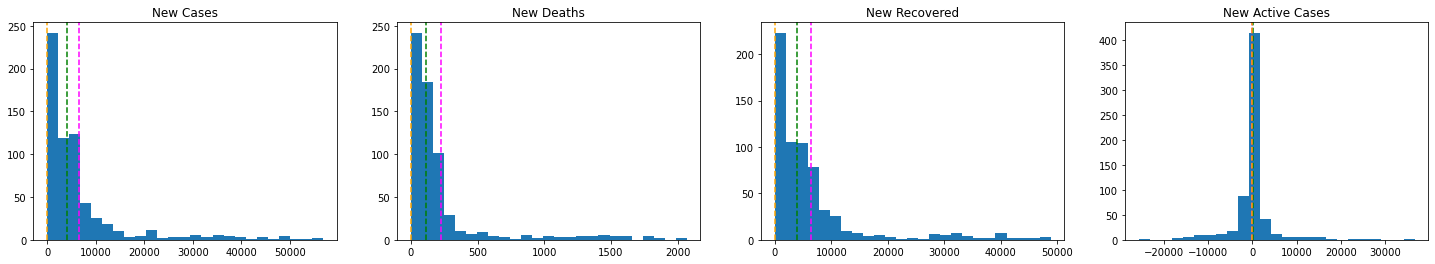

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(25, 4))
for i, col in enumerate(col_daily):
    ax[i].hist(df_IDN[col], bins=25)
    ax[i].set_title(col)
    ax[i].axvline(df_IDN[col].mean(), color='magenta', linestyle='dashed')
    ax[i].axvline(df_IDN[col].median(), color='green', linestyle='dashed')
    ax[i].axvline(df_IDN[col].mode().iloc[0], color='orange', linestyle='dashed')

plt.show()

Notes:
- Magenta line: mean
- Green line: median
- Orange line: mode

For `New Cases`, `New Deaths`, and `New Recovered` the mean is relatively higher than the median which means the data is right-skewed

For `New Active Cases`, the data is more of a normal distribuation with the mean, median, and mode relatively close to each other


### Measure of Variance

Consists of
- Range
- Percentiles
- Variance

#### Range

In [24]:
df_IDN[col_daily].max() - df_IDN[col_daily].min()

New Cases           56757
New Deaths           2069
New Recovered       48832
New Active Cases    62451
dtype: int64

#### Quartiles

In [25]:
df_IDN[col_daily].quantile([0.25, 0.5, 0.75])

,New Cases,New Deaths,New Recovered,New Active Cases
0.25,1044.25,47.25,889.75,-619.75
0.50,4070.50,112.00,3855.00,118.50
0.75,6737.75,193.75,6976.75,639.75


#### Variance

In [26]:
df_IDN[col_daily].var()

New Cases           9.131750e+07
New Deaths          1.294981e+05
New Recovered       8.194232e+07
New Active Cases    2.364174e+07
dtype: float64

#### Standard Deviation

In [27]:
df_IDN[col_daily].std()

New Cases           9556.018870
New Deaths           359.858505
New Recovered       9052.199569
New Active Cases    4862.277290
dtype: float64